In [1]:
# Setup

import math
import numpy.linalg as linalg
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import List
from sklearn.datasets import fetch_openml

import libraries.autodiff as autodiff

In [2]:
# Load MNIST dataset

mnist = fetch_openml(name='mnist_784', version=1)

images, labels = mnist.data, mnist.target

IMAGE_DIM: int = 28
DIGITS = 10

WRONG_ANSWER_VAL = 0
RIGHT_ANSWER_VAL = 1

def get_output_for_digit(digit: int) -> np.ndarray:
    arr = [WRONG_ANSWER_VAL for i in range(0, DIGITS)]
    arr[digit] = RIGHT_ANSWER_VAL
    return np.array(arr)

def get_correct_digit(index: int) -> int:
    return int(labels[index])

def get_output_for_index(index: int) -> np.ndarray:
    return get_output_for_digit(get_correct_digit(index))

TOTAL_TRAINING_CASES = 70000
MAX_VAL = 256

datas = []
for i in range(0, TOTAL_TRAINING_CASES):
    datas.append((np.array([v / MAX_VAL for v in images.iloc[i].values]).reshape((IMAGE_DIM, IMAGE_DIM)), get_output_for_digit(get_correct_digit(i))))

In [3]:
TRAINING_CASES = 50000
VALIDATION_CASES = 10000
TRAINING_ITERATIONS = 30
BATCH_SIZE = 10

training_cases = datas[:TRAINING_CASES]
validation_cases = datas[-VALIDATION_CASES:]

def run_training(network: autodiff.NeuralNetwork, batch_size=BATCH_SIZE, verbose=True):
    correct_portion = []
    for j in range(0, TRAINING_ITERATIONS):
        random.shuffle(training_cases)
        for i in range(0, len(training_cases), batch_size):
            batch_in = [d[0].flatten() for d in training_cases[i:i+batch_size]]
            batch_out = [d[1] for d in training_cases[i:i+batch_size]]
            network.train_batch(batch_in, batch_out)
        if verbose:
            print(np.linalg.norm(network.get_parameters()))

        total_correct = 0
        for i in range(0, len(validation_cases)):
            image = validation_cases[i][0]

            result_raw = network.forwards(image)
            result = np.argmax(result_raw)
            
            if result == np.argmax(validation_cases[i][1]):
                total_correct += 1

        correct_portion.append(total_correct / len(validation_cases))
        if verbose:
            print(str(total_correct / len(validation_cases) * 100) + '% correct')

    return correct_portion

### Linear Model

In [4]:
LOSS_TYPE = autodiff.LossType.CROSS_ENTROPY
OPTIMIZER = autodiff.AdamOptimizer(0.01, 0.9, 0.99)
WEIGHT_DECAY_RATE = 0
WEIGHT_DECAY_EXP = 2
LAYERS = [autodiff.SimpleLayer(DIGITS, activation_type=autodiff.ActivationFunction.NONE, weight_init_type=autodiff.InitializationType.TINY, bias_init_type=autodiff.InitializationType.ZEROES)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, LOSS_TYPE, OPTIMIZER, WEIGHT_DECAY_RATE, WEIGHT_DECAY_EXP)

#network.check(np.array([d[0].reshape((IMAGE_DIM*IMAGE_DIM, 1)) for d in training_cases[0:1]]), True)

affine_correct_portion = run_training(network)

(10, 1) x 1
56.87089180938573
88.67% correct
84.58965973298994
90.73% correct
106.54730215348161
90.69% correct
125.33573016069029
90.36999999999999% correct
142.03810362135283
88.14% correct
157.75450553237536
89.09% correct
171.95217720284828
90.25999999999999% correct
186.7402317957074
89.97% correct
199.80137262642253
88.91% correct
212.87204371878
90.95% correct
225.50411583113305
90.27% correct
237.80639012807768
90.33% correct
249.65403085700132
91.56% correct
260.8074105066402
90.86% correct
272.1873574676212
90.10000000000001% correct
283.45543944036433
90.98% correct
294.68096734835916
90.51% correct
305.2289506006401
91.24% correct
316.10594853606625
90.73% correct
326.9165656677711
91.16% correct
337.59873940690113
91.19% correct
348.1386796468421
90.62% correct
358.3268796927994
90.25% correct
369.0032206676791
90.99000000000001% correct
378.6793445713372
90.16999999999999% correct
388.53406152858463
90.9% correct
398.46430353537903
91.36% correct


c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:456: RuntimeWarning: divide by zero encountered in divide
  self.sources[1].grad += -self.grad * self.sources[0].result / (self.sources[1].result ** 2)
c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:456: RuntimeWarning: invalid value encountered in divide
  self.sources[1].grad += -self.grad * self.sources[0].result / (self.sources[1].result ** 2)


nan
9.8% correct
nan
9.8% correct
nan
9.8% correct


In [5]:
import pickle

with open("affine_results.pickle", "wb") as file:
    pickle.dump(affine_correct_portion, file)

with open("affine.pickle", "wb") as file:
    pickle.dump(network, file)

print(network.total_parameters)

7850


In [6]:
OPTIMIZER = autodiff.AdamOptimizer(0.01, 0.9, 0.99)
LAYERS = [autodiff.SimpleLayer(16, activation_type=autodiff.ActivationFunction.SIGMOID, weight_init_type=autodiff.InitializationType.NORMAL, bias_init_type=autodiff.InitializationType.ZEROES),
            autodiff.SimpleLayer(16, activation_type=autodiff.ActivationFunction.SIGMOID, weight_init_type=autodiff.InitializationType.NORMAL, bias_init_type=autodiff.InitializationType.ZEROES),
            autodiff.SimpleLayer(DIGITS, activation_type=autodiff.ActivationFunction.SIGMOID, weight_init_type=autodiff.InitializationType.NORMAL, bias_init_type=autodiff.InitializationType.ZEROES)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, LOSS_TYPE, OPTIMIZER)

network_correct_portion = run_training(network)

(16, 1) x 1
(16, 1) x 1
(10, 1) x 1
140.8955036110305
89.33% correct
160.29474144265293
90.88000000000001% correct
176.33033071716832
91.59% correct
190.75400833701858
91.22% correct
202.59488469124747
92.29% correct
214.60817353968596
92.24% correct
226.27646347044964
92.47% correct
237.70497897350216
92.53% correct
248.34504559353365
92.80000000000001% correct
258.40730376115886
92.43% correct
268.5256694816224
92.57% correct
277.30900760514083
92.47999999999999% correct
285.9874748182314
93.13% correct
294.56126911076024
92.39% correct
302.6321318574867
92.54% correct
311.31270481640337
92.25% correct
319.60401877822363
92.89% correct
328.0381170884881
92.53% correct
336.76243256387664
92.49000000000001% correct
344.2135636218757
92.92% correct
351.11213995000315
93.07% correct
358.85446378428566
93.34% correct
366.51155327703486
92.61% correct
373.6343840862208
92.99% correct
381.11557933825594
93.22% correct
388.46450907193906
92.93% correct
394.8997361084151
90.86999999999999% co

In [7]:
import pickle

with open("nn_results.pickle", "wb") as file:
    pickle.dump(network_correct_portion, file)

with open("nn.pickle", "wb") as file:
    pickle.dump(network, file)

print(network.total_parameters)

13002


In [8]:
from libraries.autodiff import ActivationFunction as af
from libraries.autodiff import InitializationType as it

IMAGE_DIM: int = 28
IMAGE_SIZE = (IMAGE_DIM, IMAGE_DIM)
DIGITS = 10

LOSS_TYPE = autodiff.LossType.CROSS_ENTROPY
OPTIMIZER = autodiff.AdamOptimizer(0.01, 0.9, 0.99)
WEIGHT_DECAY_RATE = 0
WEIGHT_DECAY_EXP = 2
LAYERS = [autodiff.SplitLayer(16), # 28 x 28 (x16)
          autodiff.ConvolutionLayer((5,5), (1,1), activation_type=af.SIGMOID, init_type=it.NORMAL, pre_padding=(2,2)), # 28 x 28 (x16)
          autodiff.ConvolutionLayer((2,2), (2,2), activation_type=af.NONE, init_type=it.NORMAL, pre_padding=(0,0)), # 14 x 14 (x16)
          autodiff.ConvolutionLayer((5,5), (1,1), activation_type=af.SIGMOID, init_type=it.NORMAL, pre_padding=(1,1)), # 12 x 12 (x16)
          autodiff.ConvolutionLayer((3,3), (3,3), activation_type=af.SIGMOID, init_type=it.NORMAL, pre_padding=(0,0)), # 4 x 4 (x16)
          autodiff.ConvolutionLayer((4,4), (4,4), activation_type=af.SIGMOID, init_type=it.NORMAL, pre_padding=(0,0)), # 1 x 1 (x16)
          autodiff.MergeLayer(), # 16 x 1
          autodiff.SimpleLayer(DIGITS, activation_type=af.SIGMOID, weight_init_type=it.NORMAL)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork(IMAGE_SIZE, LAYERS, LOSS_TYPE, OPTIMIZER, WEIGHT_DECAY_RATE, WEIGHT_DECAY_EXP)

conv_correct_portion = run_training(network)

(28, 28) x 16
(28, 28) x 16
(14, 14) x 16
(12, 12) x 16
(4, 4) x 16
(1, 1) x 16
(16, 1) x 1
(10, 1) x 1
72.3397321772316
92.24% correct
85.47849297701458
93.97% correct
95.54620460767494
93.32000000000001% correct
103.89222322364719
94.89999999999999% correct
110.91614563158403
94.78% correct
117.4668631839789
95.08% correct
123.72612037916531
95.54% correct
129.57724665905457
95.61% correct
135.21473960061886
95.49% correct
140.82957377757901
95.35% correct
146.38710263533014
95.78% correct
151.4138817398948
95.61% correct
156.40284146408155
95.52000000000001% correct
161.1588738715304
96.19% correct
165.91486370663193
95.99% correct
170.43698789172907
95.69% correct
175.2819573559986
95.89% correct
180.01194183691217
96.17999999999999% correct
184.9376720692702
96.03% correct
189.42165190077023
95.65% correct
193.57316918360124
95.94% correct
198.27904787763345
96.14% correct
202.78925506737605
95.8% correct
207.18007817514535
95.97% correct
211.5358109929835
95.62% correct
215.50483

In [9]:
import pickle

with open("cnn_results.pickle", "wb") as file:
    pickle.dump(conv_correct_portion, file)

with open("cnn.pickle", "wb") as file:
    pickle.dump(network, file)

print(network.total_parameters)

1434


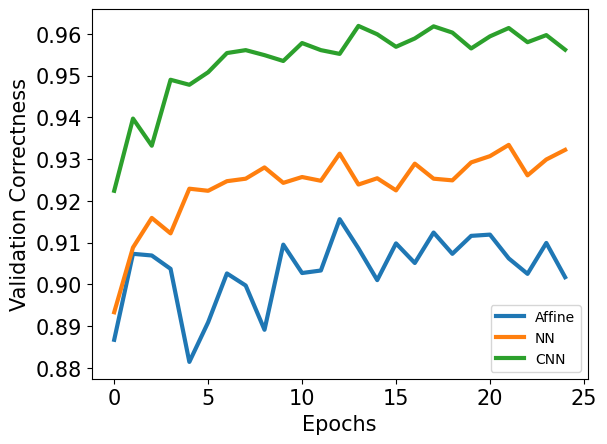

In [15]:
plt.plot(affine_correct_portion[:25], linewidth=3, label="Affine")
plt.plot(network_correct_portion[:25], linewidth=3, label="NN")
plt.plot(conv_correct_portion[:25], linewidth=3, label="CNN")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Epochs (50000 examples with batch size 10)', fontsize=15)
plt.ylabel('Validation Correctness', fontsize=15)
plt.legend()

Extra visualization code for CNN layers

In [ ]:
INDEX = 16*5+1
DO_TEXT = False

def plot_results(size_x, size_y, grid, do_text: True):

    minimum = min(grid)
    maximum = max(grid)
    extreme = max(abs(minimum), abs(maximum))

    results = grid.reshape(size_x, size_y)

    fig, ax = plt.subplots()
    im = ax.imshow(results, cmap='viridis', vmin=-extreme, vmax=extreme)
    ax.set_axis_off()
    #print(results)

    if do_text:
        for i in range(size_x):
            for j in range(size_y):
                text = ax.text(i, j, '%.2f'%(results[j, i]), ha="center", va="center", color="black")

vals = list(network.cost.input_nodes.keys())
print(network.cost.input_nodes[vals[1]].size)

var = network.cost.input_nodes[vals[INDEX]]
plot_results(var.size[0], var.size[1], network.get_parameters()[var.input_start_index : var.input_start_index + var.variable_count], DO_TEXT)
